<a href="https://colab.research.google.com/github/lightweightcobra/Machine-Learning/blob/main/ADITYA_KUMAR_CS_IT308_LAB_5_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> IIIT Vadodara </center>
## <center> Winter 2023-24 </center>
## <center> CS/IT 308, CS 652, CS8XX Machine Learning Lab </center>
## <center> Lab#5 Logistic regression for clasification </center>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import misc
from numpy import linalg as la
import matplotlib.image as mpimg
import glob
from numpy import linalg as LA
import scipy.io as sio

## <font color='blue'> Brief about **Gradient descent optimization**:
---


Given a system $Ax=b$, we find $x$ for given observations $b$ and coeffiecient matrix $A$. When $b$ is not in column space of $A$, then $Ax \neq b$ and we need to find $x$ in such a way that $Ax \approx b$.

<br>
Linear least square is one of the methods to estimate $x$ by minimizing the mean square error as, $\min ||Ax-b||_2$. This can be written as,
        
$\underset{x}{\mathrm{argmin}}||Ax-b||_{2}^{2} = f(x)$

We need to find $x$ in such a way that $f(x)$ will be minimum in $L_2$ norm.

<br>


We will solve this by applying gradient descent algortithm on $f(x)$.
<br>
To apply this algorithm we need to find gradient of the function, i.e.,
<br>
              $\Delta_x f(x)= A^T(Ax-b) = A^TAx-A^Tb$

<br>


Optimisation for least-squares
<br>
$||A^TAx-A^Tb||_2>\delta$, $\delta$ is the small positive number indicating tolerance.

<br>

Now we will find new x iteratively using step size $\alpha$ to find the best fit for $AX=b$ as:

<br>
$x^{[n+1]}=x^{[n]}-\alpha (A^TAx-A^Tb)$.
<br>

We need to choose $\alpha$, $\delta$ and $x^{[0]}$ to iterate until $x^{[n+1]} \rightarrow x^{[n]}$.

## <font color='red'> **Problem 1)**
Consider $A=\begin{bmatrix}
0.7 & 0.2\\
0.1 & 0.6
\end{bmatrix}$ and the observation matrix $b=\begin{bmatrix}
0.5\\
0.6
\end{bmatrix}$ in a system $Ax=b$. However, $b$ is not in column space of $A$, thus $Ax \neq b$ and we need to find $x$ in such a way that $Ax \approx b$. Using linear least square $x$ can be estimated by minimizing the mean squared error as,  $\min ||Ax-b||_2$. Use gradient descent optimization to minimize the functional and obtain estimated value of $x$, i.e., $\hat{x}_{gd-opt}$.


Now, find out $\hat{x}$ using psuedoinverse or normal equation, i.e., $\hat{x}_{pinv}$. Check, is  $\hat{x}_{pinv}$ = $\hat{x}_{gd-opt}$? Yes/No, comment.



In [ ]:
# write code here
A = np.array([[0.7, 0.2], [0.1, 0.6]])
b = np.array([0.5, 0.6])
# By psedoInverse
x_pseudo = la.pinv(A)@b
print("The value of x by pseudoinverse is: ",x_pseudo)

x = np.zeros(A.shape[1])

step_size = 0.01
iterations = 10000

for i in range (iterations):
  Ax = np.dot(A, x)
  gradient = np.dot(A.T, Ax - b)
  x -= step_size * gradient

print("The value of x by gradient descent is: ",x)

The value of x by pseudoinverse is:  [0.45  0.925]
The value of x by gradient descent is:  [0.45  0.925]


##  <font color='blue'> Logistic regression

---
Cost funcion for logistic regression,
$$
\begin{aligned}
J(\theta) &=\frac{1}{m} \sum_{i=1}^{m} \cos t\left(h_{\theta}\left(x^{i}\right), y^{\prime}\right) \\
&=-\frac{1}{m}\left[\sum_{i=1}^{m} y^{i} \log h_{\theta}\left(x^{i}\right)+\left(1-y^{i}\right)\right.\log \left(1-\log \left(x^{i}\right)\right]\\
h(x)&=\frac{1}{1+e^{-\Theta^Tx}}
\end{aligned}
$$
So, using gradient descent
$$
\Theta_{i+1}=\Theta_{i}-\frac{\alpha}{m} \sum_{i=1}^{m}\left(h\left(x^{i} \Theta\right)-y^{i}\right)
$$
iterate till $$
\Theta_{i+1} \cong \Theta_{i}
$$




## <font color='red'> 2. Perform logistic regression on the dataset given below.
Here, to classify 2D data,
decision line can be given as,
$$\theta_0+\theta_1x+\theta_2y=0$$
Let, $$\Theta^T=\begin{bmatrix}
\theta_0\\
\theta_1\\
\theta_2
\end{bmatrix}$$

In [ ]:
#Dataset example

X = np.array([[0,0,0],[0,1,0],[0,2,0],[0,3,1],[1,0,0],[1,1,0],[1,2,1],[1,3,1],[2,0,0],[2,1,1],[2,2,1],[2,3,1]])
x = X[:, :-1]
y = X[:, -1]
print("x|y|class")
print(x)
print(y)

x|y|class
[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [2 0]
 [2 1]
 [2 2]
 [2 3]]
[0 0 0 1 0 0 1 1 0 1 1 1]


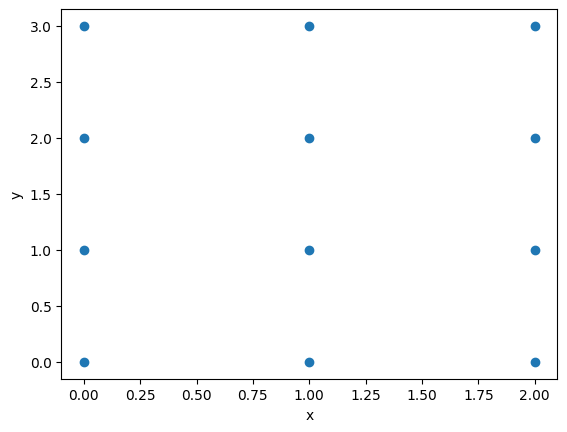

In [ ]:
#Generate scatter plot of X
plt.scatter(X[:,0], X[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Generate X by concatinating ones and X
x = np.c_[np.ones((x.shape[0], 1)), x]

In [ ]:
#write code for gradient descent to find thetas
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def decision_boundary(x, theta):
    return sigmoid(np.dot(x, theta))

theta = np.zeros(x.shape[1])
alpha = 0.01
iterations = 10000


for i in range(iterations):
    h = decision_boundary(x, theta)
    gradient = np.dot(x.T, (h - y)) / y.size
    theta -= alpha * gradient



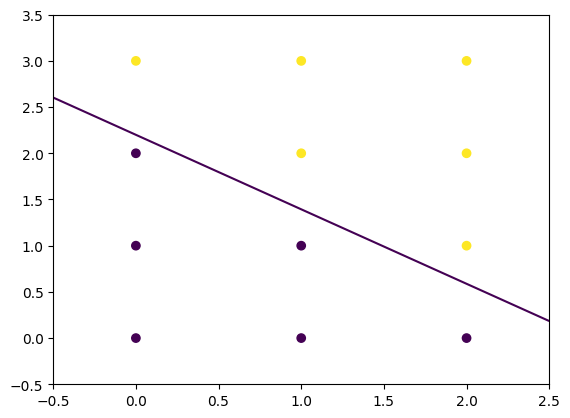

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=X[:, -1])
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.linspace(x_min-0.5, x_max+0.5), np.linspace(y_min-0.5, y_max+0.5))
grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
probs = decision_boundary(grid, theta).reshape(xx.shape)
plt.contour(xx, yy, probs, levels=[0.5])
plt.show()

In [ ]:
# Classify the points and calculate the accuracy
predict = sigmoid(np.dot(x, theta))
predict[predict >= 0.5] = 1
predict[predict < 0.5] = 0

accuracy = np.mean(predict == y) * 100
print("Accuracy: {}%".format(accuracy))



Accuracy: 100.0%
